# Model Building

---

1. Import packages
2. Load data
3. Modelling

---

## 1.) Import packages

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline


sns.set(style="darkgrid",font_scale=1.5)

---
## 2.) Load data

In [27]:
df=pd.read_csv('../data/feature_engineered_data/customer_churn_data.csv')

#### Show Top 5 Records

In [28]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,3.737670,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,3.713572,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,3.737670,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,3.663562,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,3.761200,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


---

## 3.) Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

## 4.) Segregating Features & Labels for Model Training.

In [30]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

## 5.) Splitting Data For Model Training & Testing.

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


## 6.) Applying SMOTE to Overcome the Class-Imbalance in Target Variable

In [33]:
smt = SMOTE(random_state=42)

In [34]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [35]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 16) (12736,)


In [36]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
0,6368
1,6368


###  Insight:
- Both the categories in Target variable are now having equal number of records.
- So we can train the Model pn balanced records for both churn categories and make a predictive model with low bias.
---

# Model Creation

---

## Decision Tree Classifier

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [39]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

### 2. Fetching the Best Parameters for DecisionTree Model

In [40]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'random_state': 0,
 'splitter': 'random'}

### 3. Creating DecisionTree Model Using Best Parameters.

In [41]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=0,
                       splitter='random')

### 4. Computing Model Accuracy.

In [42]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.85 %
Accuracy Score of Model on Testing Data  is => 83.65 %


### 5. Model Evaluation using Different Metric Values.

In [43]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8365
Recall Score of the Model is => 0.8365
Precision Score of the Model is => 0.8365


Insight:
- We can observe that recall, precision, and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).
- The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

### 6. Finding Importance of Features in DecisionTreeClassifier.

In [44]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

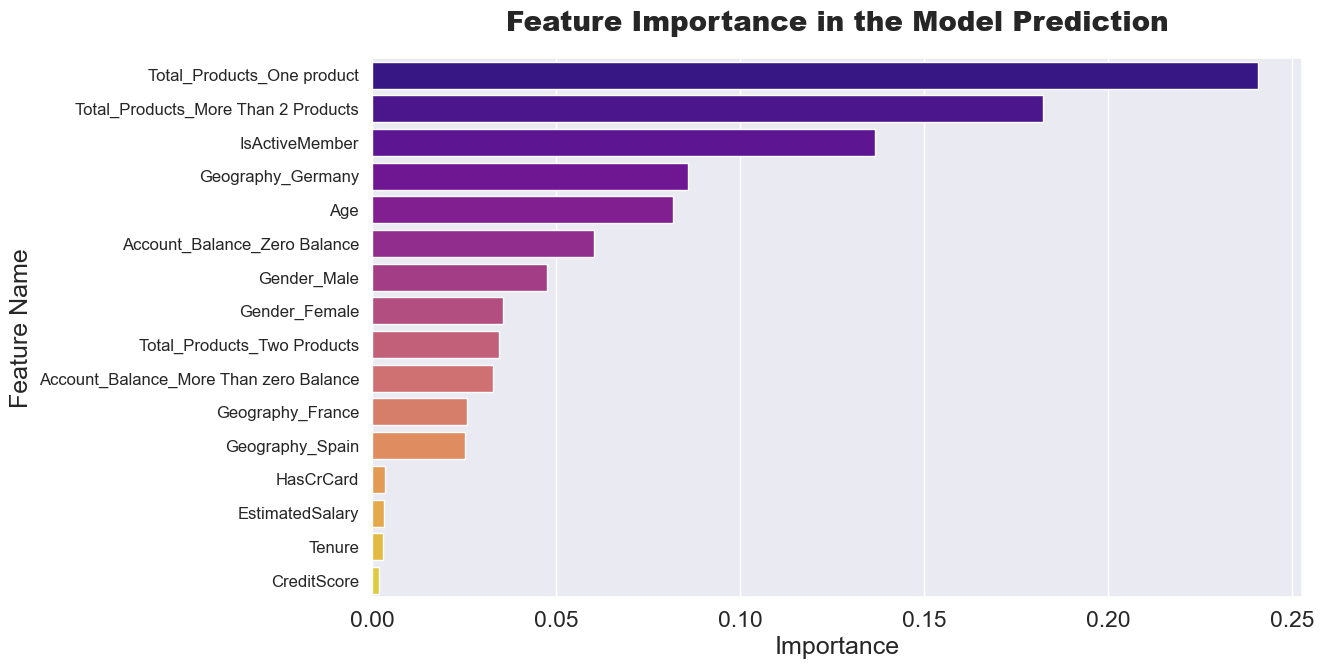

In [45]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

Insight:
- The key factors that significantly influence the deactivation of customers banking facilities are:-
Total_Products, Age, IsActiveMember, Geography, Balance and Gender.
- The minimal impact of features on the deactivation of customers' banking facilities are:-
CreditScore, HasCrCard, Tenure and EstimatedSalary

### 8. Model Evaluation using Confusion Matrix.

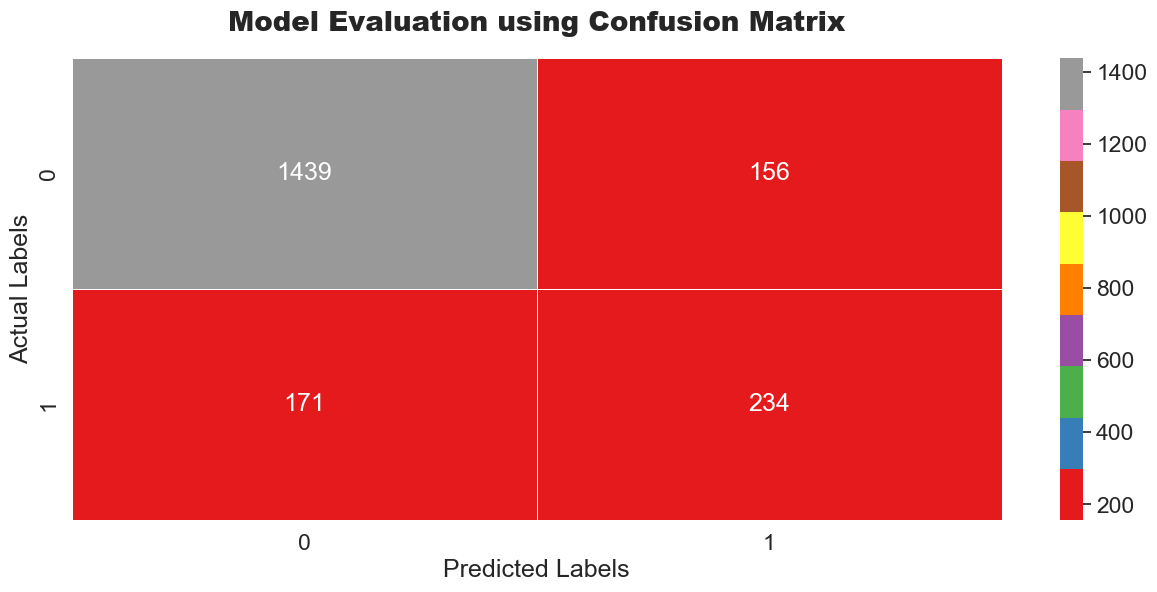

In [47]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

 Insight:
* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

 * **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

---

## RandomForest Classifier
---

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [48]:
rfc = RandomForestClassifier()

In [49]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [50]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

### 2. Fetchiing the Best Parameters for RandomForest Model.

In [51]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 70}

### 3. Creating RandomForest Model Using Best Parameters.

In [52]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=70)

### 4. Computing Model Accuracy.

In [53]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 90.33 %
Accuracy Score of Model on Testing Data  is => 84.45 %


### 5. Model Evaluation using Different Metric Values

In [54]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8445
Recall Score of the Model is => 0.8445
Precision Score of the Model is => 0.8445


 Insight:
- We can observe that recall, precision, and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).
- The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

### 6. Finding Importance of Features in RandomForest Model

In [55]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

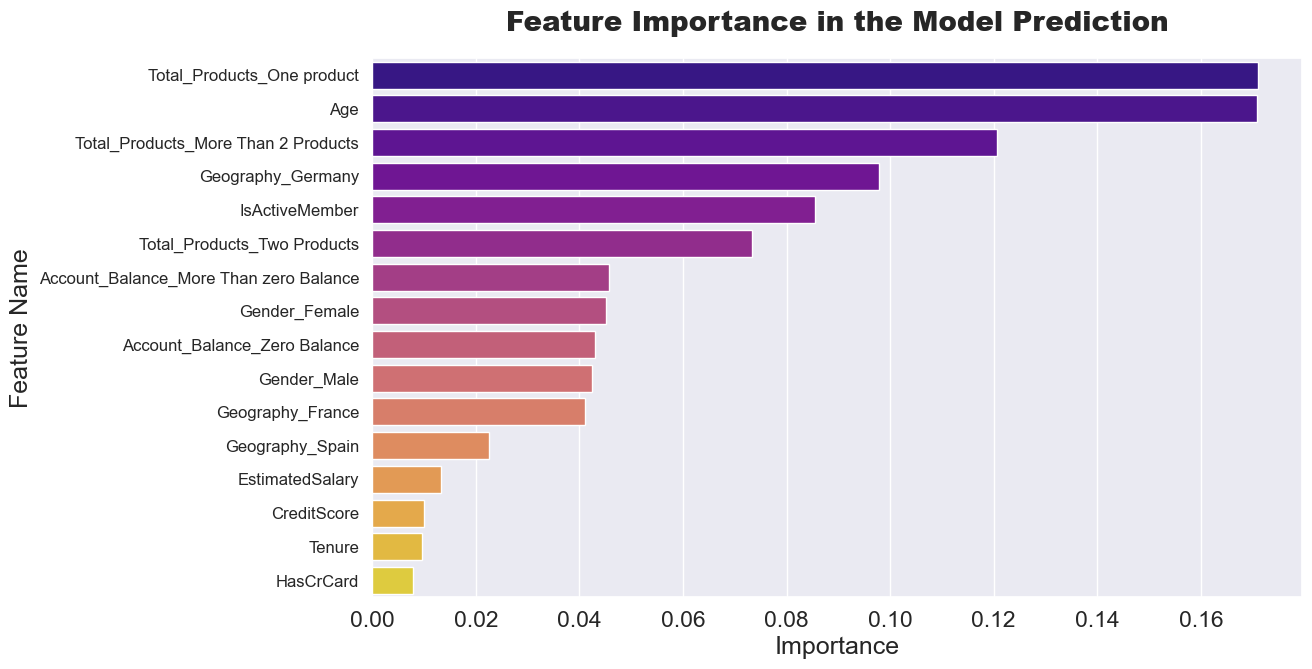

In [56]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

Insight:
- The key factors that significantly influence the deactivation of customers banking facilities are:-
Total_Products, Age, IsActiveMember, Geography, Gende and Balance.
- The minimal impact of features on the deactivation of customers' banking facilities are:-
HasCrCard, Tenure, CreditScore and EstimatedSalary

### 8. Model Evaluation using Confusion Matrix

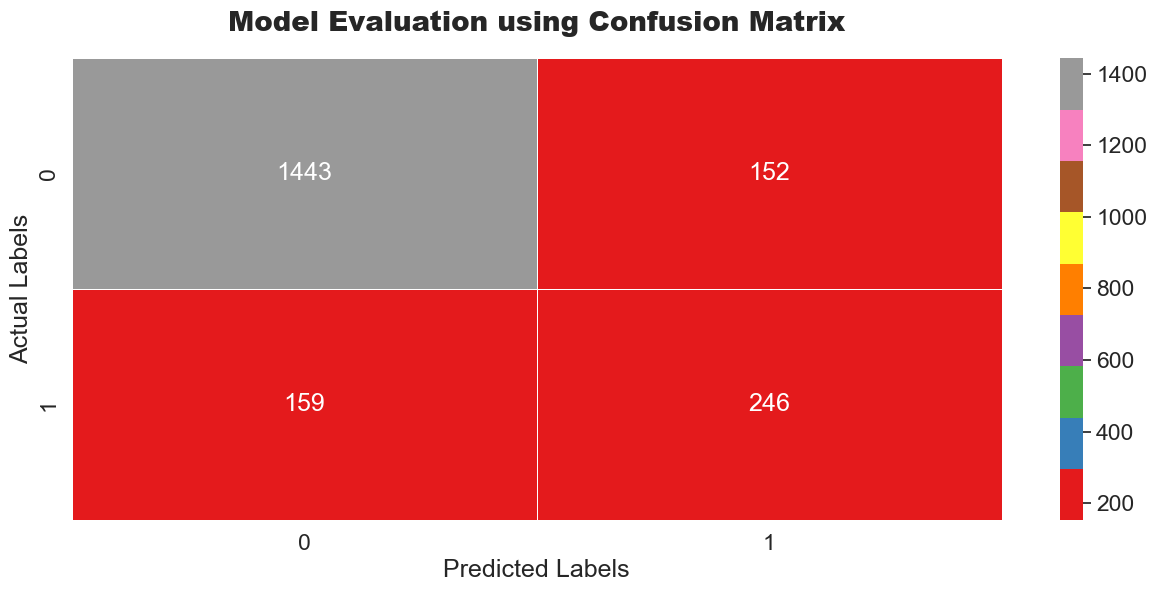

In [57]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

 Insight:
* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome. 
* **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

##  Conclusion 


- The key factors that significantly influence the deactivation of customers banking facilities are Total_Products, Age, IsActiveMember, Gender and Geography.

- High Training and Testing Accuracies: Both the model achieved a high accuracy score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 85% on the testing data suggests its ability to generalize well to unseen instances.

- High F1 Score, Recall, and Precision: The model achieved high F1 score, recall, and precision values, all approximately 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.

## Overall Model Performance:

 * The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.